In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
pd.set_option("display.max_colwidth", 200)

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes')) 
documents = dataset.data 
len(documents)

11314

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
news_df = pd.DataFrame({'document':documents}) 
# remove everything except alphabets` 
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ") 
# remove short words 
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3])) 
# make all text lowercase 
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-4-833954355eeb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [ ]:
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
# stop_words = stopwords.words('english') 
# tokenization 
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) 
# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stopwords]) 
# de-tokenization 
detokenized_doc = [] 
for i in range(len(news_df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
news_df['clean_doc'] = detokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
X = vectorizer.fit_transform(news_df['clean_doc']) 
X.shape

(11314, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD 
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) 
svd_model.fit(X) 
len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names_out() 
for i, comp in enumerate(svd_model.components_): 
    terms_comp = zip(terms, comp) 
    sorted_terms = sorted(terms_comp, key= lambda x:x[1],        
    reverse=True)[:7] 
    print("Topic "+str(i)+": ", end="") 
    for t in sorted_terms: 
        print(t[0], end="") 
        print(" ", end="\t")
    print()

Topic 0: like 	know 	people 	think 	good 	time 	thanks 	
Topic 1: thanks 	windows 	card 	drive 	mail 	file 	advance 	
Topic 2: game 	team 	year 	games 	season 	players 	good 	
Topic 3: drive 	scsi 	hard 	disk 	card 	drives 	problem 	
Topic 4: windows 	file 	window 	files 	program 	using 	problem 	
Topic 5: chip 	government 	mail 	space 	information 	encryption 	data 	
Topic 6: like 	bike 	chip 	know 	sounds 	looks 	look 	
Topic 7: card 	video 	sale 	monitor 	offer 	price 	jesus 	
Topic 8: know 	card 	chip 	government 	video 	people 	clipper 	
Topic 9: good 	know 	time 	bike 	jesus 	problem 	work 	
Topic 10: think 	chip 	good 	thanks 	clipper 	encryption 	need 	
Topic 11: thanks 	good 	right 	bike 	problem 	people 	time 	
Topic 12: good 	people 	windows 	know 	file 	sale 	files 	
Topic 13: space 	think 	know 	nasa 	problem 	year 	israel 	
Topic 14: space 	good 	card 	people 	time 	nasa 	thanks 	
Topic 15: people 	problem 	window 	time 	game 	want 	work 	
Topic 16: time 	bike 	right 	win

In [ ]:
# !pip install umap-learn

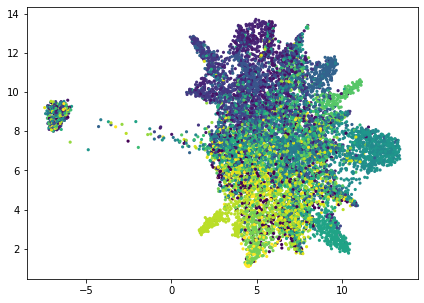

In [ ]:
import umap.umap_ as umap
X_topics = svd_model.fit_transform(X) 
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics) 
plt.figure(figsize=(7,5)) 
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target, 
s = 10, # size 
edgecolor='none' ) 
plt.show()